<a href="https://colab.research.google.com/github/Kozhedu/Car_Moldova/blob/main/%D0%94%D0%97_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 0. Загрузка очищенных данных и первичный анализ




In [ ]:
df =  pd.read_csv('cars_moldova_clean.csv', delimiter = ',')

In [ ]:
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
...,...,...,...,...,...,...,...,...,...
32529,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
32530,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
32531,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
32532,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [ ]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

In [ ]:
df[num_columns]

,Year,Distance,Engine_capacity(cm3),Price(euro)
0,2011,195000.0,1800.0,7750.0
1,2014,135000.0,1500.0,8550.0
2,2012,110000.0,1500.0,6550.0
3,2006,200000.0,1600.0,4100.0
4,2000,300000.0,2200.0,3490.0
...,...,...,...,...
32529,2016,88000.0,1800.0,11500.0
32530,2002,225000.0,1800.0,4400.0
32531,2015,89000.0,1500.0,7000.0
32532,2006,370000.0,2000.0,4000.0


In [ ]:
df.nunique()

Make                      79
Model                    782
Year                      50
Style                     12
Distance                8172
Engine_capacity(cm3)     609
Fuel_type                  6
Transmission               2
Price(euro)             1689
dtype: int64

# 1.Визуализация данных 

## 1.1. Cкатерограммы

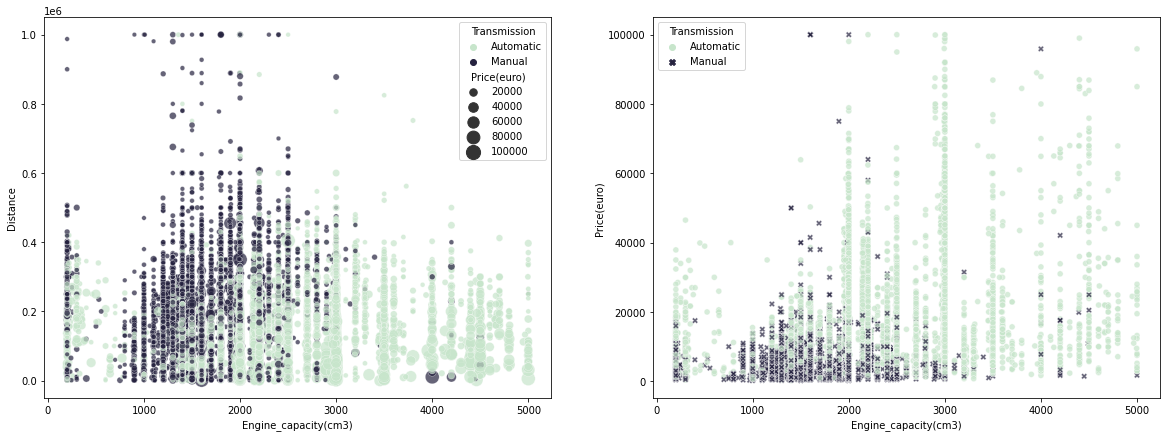

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x = "Engine_capacity(cm3)", y = "Distance", hue="Transmission", size = "Price(euro)", alpha=0.7, sizes=(20, 200), palette="ch:s=.25,r=-.5")
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x = "Engine_capacity(cm3)", y = "Price(euro)", hue="Transmission", alpha=0.7, sizes=(20, 200), palette="ch:s=.25,r=-.5", style="Transmission")

Самыми дорогими автомобилями являются автомобили с автоматической коробкой передач и небольшим пробегом, тогда как среди недорогих авто больше всего автомобилей с ручным управлением.
Мощность двигателя у автомобилей с автоматической коробкой передач в основном больше, чем у авто с ручным управлением, и стоимость таких авто гораздо выше, чем у авто с ручным управлением и небольшим объемом двигателя.

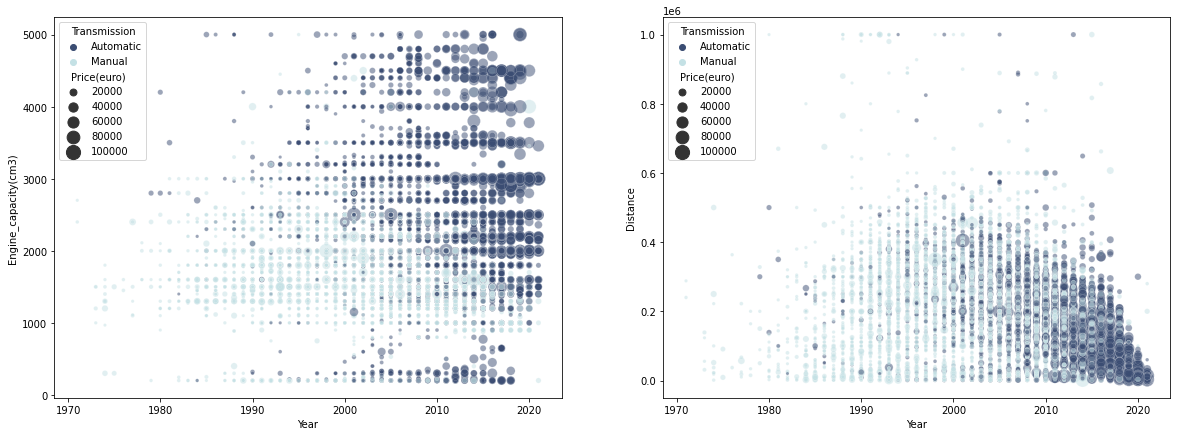

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x = "Year", y = "Engine_capacity(cm3)", hue="Transmission", size = "Price(euro)", sizes=(10, 200),  alpha=.5, palette="ch:r=-.2,d=.3_r")
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x = "Year", y = "Distance", hue="Transmission", size = "Price(euro)", sizes=(10, 200),  alpha=.5, palette="ch:r=-.2,d=.3_r")

Более дорогими авто являются автомобили выпущенные ранее 2019 года с автоматической коробкой передач и мощностью двигателя более 2 000 см3. Чем меньше автомобилю лет, тем он дороже.

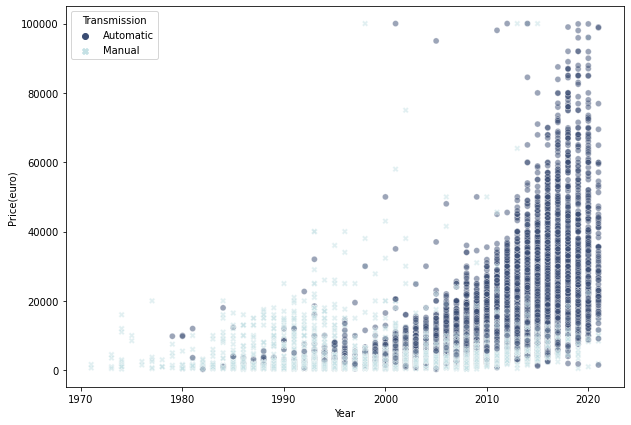

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x = "Year", y = "Price(euro)", hue="Transmission", alpha=.5, palette="ch:r=-.2,d=.3_r", style="Transmission")

Файл в основном представлен новыми авто с автоматической коробкой передач и подержанными авто с ручным управлением.

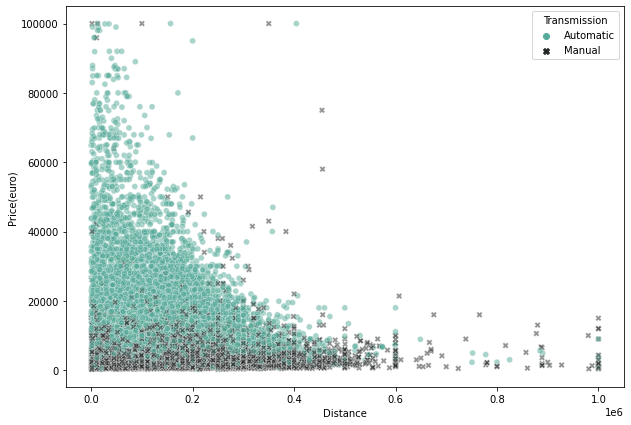

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x = "Distance", y = "Price(euro)", hue="Transmission", alpha=.5, palette="dark:#5A9_r", style="Transmission")

Чем меньше пробег, тем авто дороже. С большим пробегом и недорогие - авто с пробегом.

<Figure size 720x504 with 0 Axes>

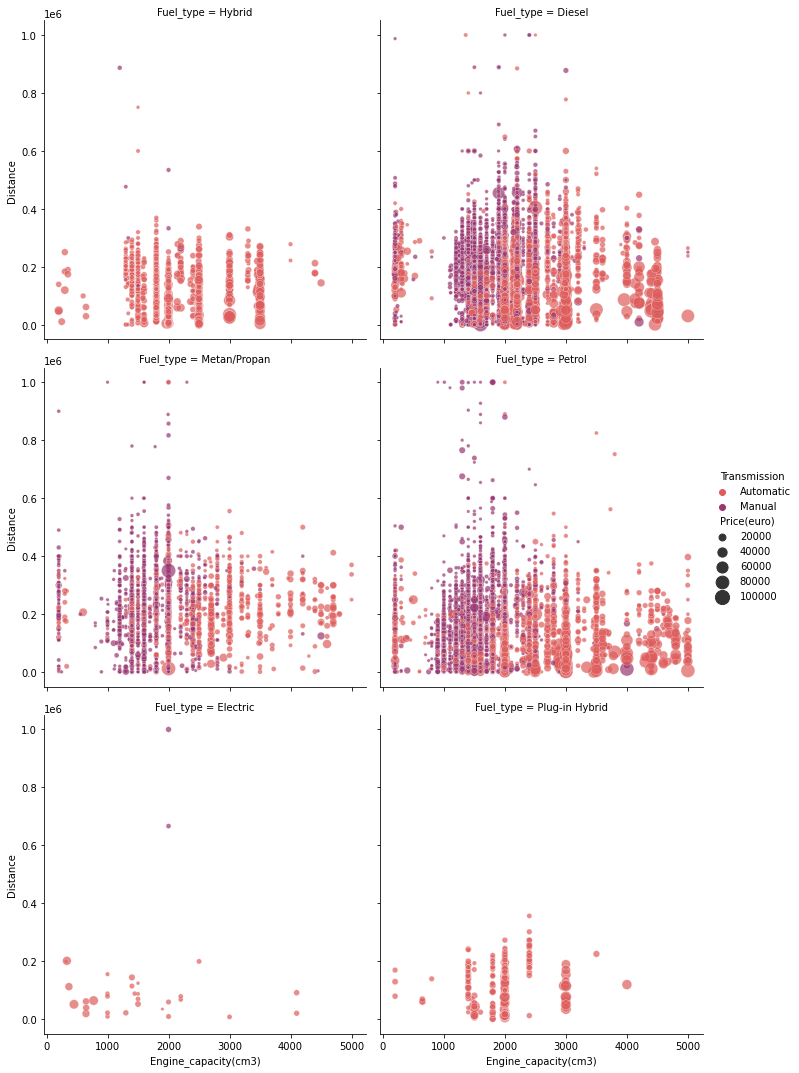

In [ ]:
plt.figure(figsize=(10,7))
sns.relplot(data=df, x = "Engine_capacity(cm3)", y = "Distance", alpha=0.7, hue="Transmission" , palette="flare", col="Fuel_type", kind="scatter", col_wrap=2, size = "Price(euro)", sizes=(10, 200))

Тип топлива - гибрид, электро и plug-in hybrid представлен в основном авто с автоматической коробкой передач. Дизель, Метан\Пропан и Петрол представлен как авто с механической, так и с автоматической коробкой передач, при этом, как и выше наблюдается закономерность, что самые дорогие авто - с автоматической коробкой передач, небольшой дистанцией и более мощным двигателем

## 1.2. Гистограммы

In [ ]:
num=["Year",	"Distance",	"Engine_capacity(cm3)",	"Price(euro)"]

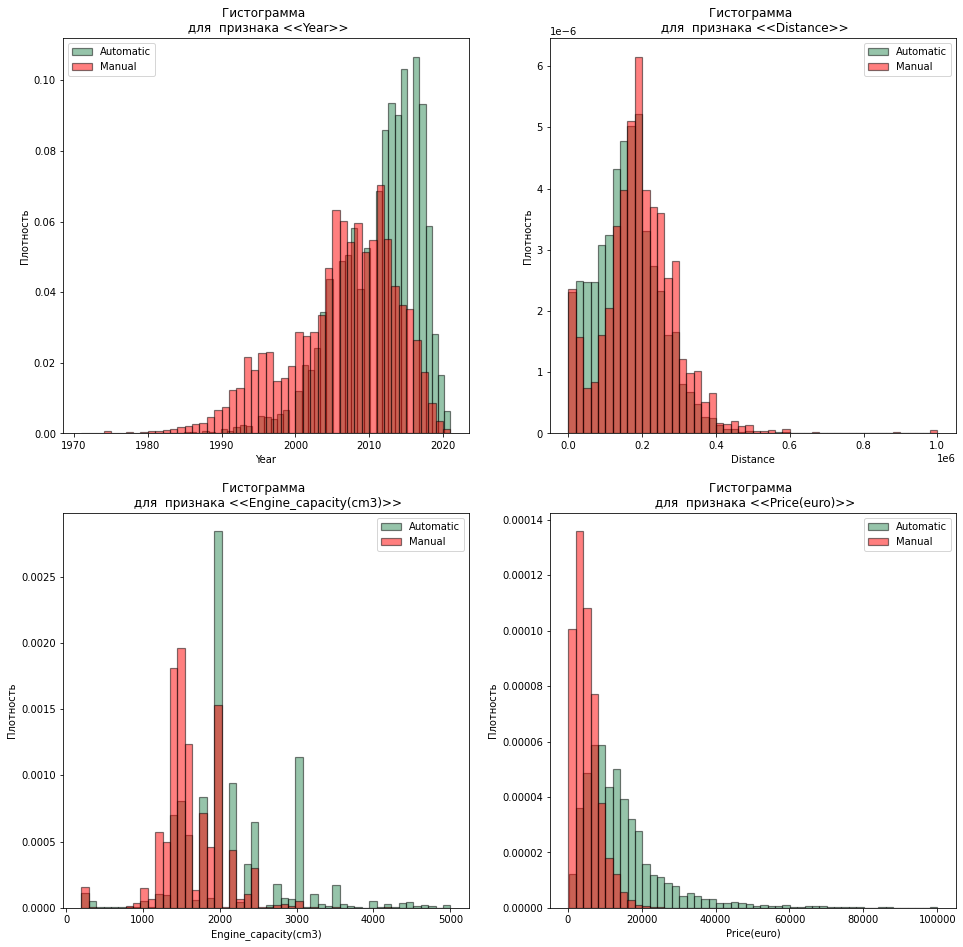

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16,16))
i = 0
l = 0
j = 0
for i in range(2):
    for j in range(2):
        axes[i, j].hist(df[df.Transmission == "Automatic"][num[l]], 
                        bins = 50, density=True, color = "seagreen", edgecolor='black', linewidth=1.2, 
                        alpha = 0.5, histtype = 'barstacked', label = 'Automatic')
        axes[i, j].hist(df[df.Transmission  == "Manual" ][num[l]], 
                        bins = 50, density=True,  color = "red", edgecolor='black', linewidth=1.2, 
                        alpha = 0.5, histtype = 'barstacked', label = 'Manual')
        axes[i, j].set_title("Гистограмма \n для  признака <<{}>>".format(num[l]))
        axes[i, j].set_xlabel(num[l])
        axes[i, j].set_ylabel('Плотность')
        axes[i, j].legend()
        l+=1

Авто с автоматической коробкой передач представленные в датасете в основном имеют меньший пробег и являются более новыми, как результат более дорогими, чем авто с механической коробкой передач.

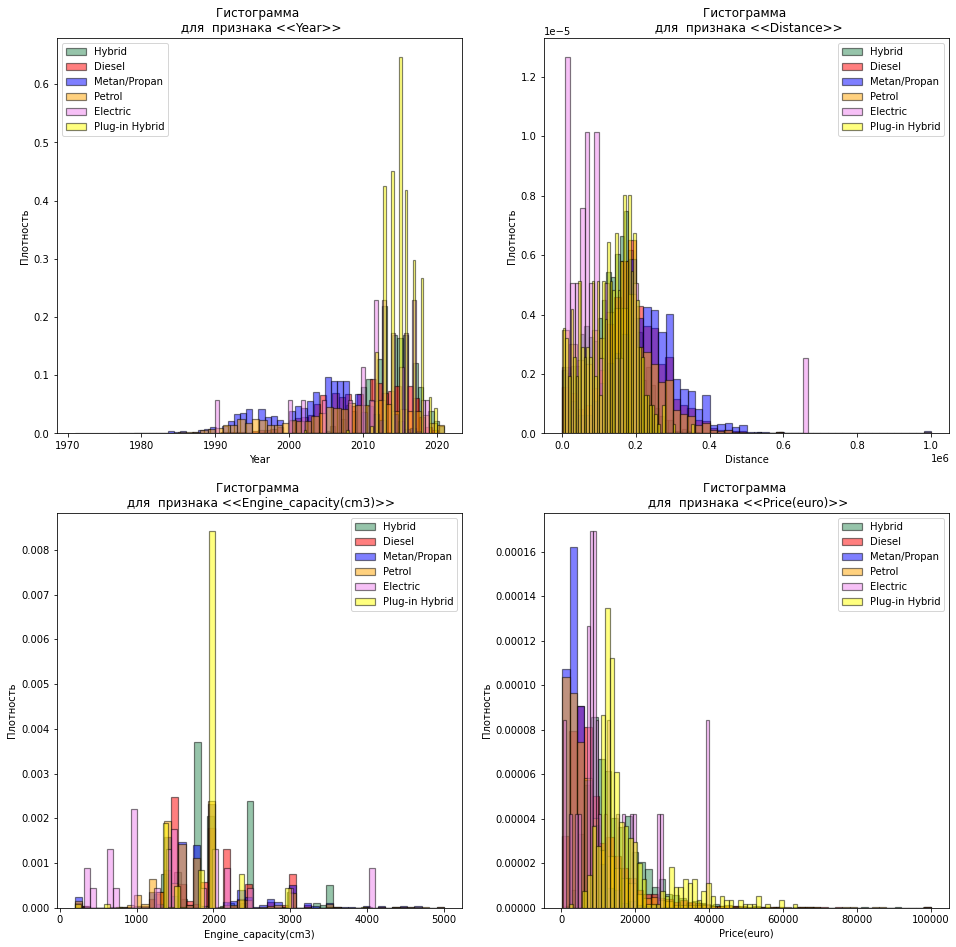

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16,16))
i = 0
l = 0
j = 0
for i in range(2):
    for j in range(2):
        axes[i, j].hist(df[df.Fuel_type == "Hybrid"][num[l]], 
                        bins = 50, density=True, color = "seagreen", edgecolor='black', linewidth=1.2, 
                        alpha = 0.5, histtype = 'barstacked', label = 'Hybrid')
        axes[i, j].hist(df[df.Fuel_type  == "Diesel" ][num[l]], 
                        bins = 50, density=True,  color = "red", edgecolor='black', linewidth=1.2, 
                        alpha = 0.5, histtype = 'barstacked', label = 'Diesel')
        axes[i, j].hist(df[df.Fuel_type  == "Metan/Propan" ][num[l]], 
                        bins = 50, density=True,  color = "blue", edgecolor='black', linewidth=1.2, 
                        alpha = 0.5, histtype = 'barstacked', label = 'Metan/Propan')
        axes[i, j].hist(df[df.Fuel_type == "Petrol"][num[l]], 
                        bins = 50, density=True, color = "orange", edgecolor='black', linewidth=1.2, 
                        alpha = 0.5, histtype = 'barstacked', label = 'Petrol')
        axes[i, j].hist(df[df.Fuel_type  == "Electric" ][num[l]], 
                        bins = 50, density=True,  color = "violet", edgecolor='black', linewidth=1.2, 
                        alpha = 0.5, histtype = 'barstacked', label = 'Electric')
        axes[i, j].hist(df[df.Fuel_type  == "Plug-in Hybrid" ][num[l]], 
                        bins = 50, density=True,  color = "yellow", edgecolor='black', linewidth=1.2, 
                        alpha = 0.5, histtype = 'barstacked', label = 'Plug-in Hybrid')
        axes[i, j].set_title("Гистограмма \n для  признака <<{}>>".format(num[l]))
        axes[i, j].set_xlabel(num[l])
        axes[i, j].set_ylabel('Плотность')
        axes[i, j].legend()
        l+=1

Тип топлива plug-in hybrid один из самых дорогих, больше всего представлен объемом двигателя 2 000 см3., так-же авто с данным типом топлива являются относительно новыми и с небольшим пробегом.
В противоположность типу топлива plug-in hybrid, большинство самых недорогих машин работают на топливе Metan/propan. Данные авто так-же являются самыми старыми и с наибольшей дистанцией пробега

# 2. Добавление в модель дополнительных признаков на основе имеющихся

## 2.1. Квантильные категории для столбца удельный пробег за год (km year) - категории «с небольшим пробегом», «со средним пробегом» и «с большим пробегом»

In [ ]:
df['Age'] = 2022 - df.Year
df['km_year'] = df.Distance/df.Age

In [ ]:
bin= ['little_mileage', 'average_mileage', 'high_mileage']

df['km_year_q'] = pd.qcut(df['km_year'],
                              q = [0, 1/3, 2/3, 1],
                              labels=bin)
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_year_q
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,high_mileage
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,average_mileage
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,little_mileage
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,average_mileage
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,average_mileage


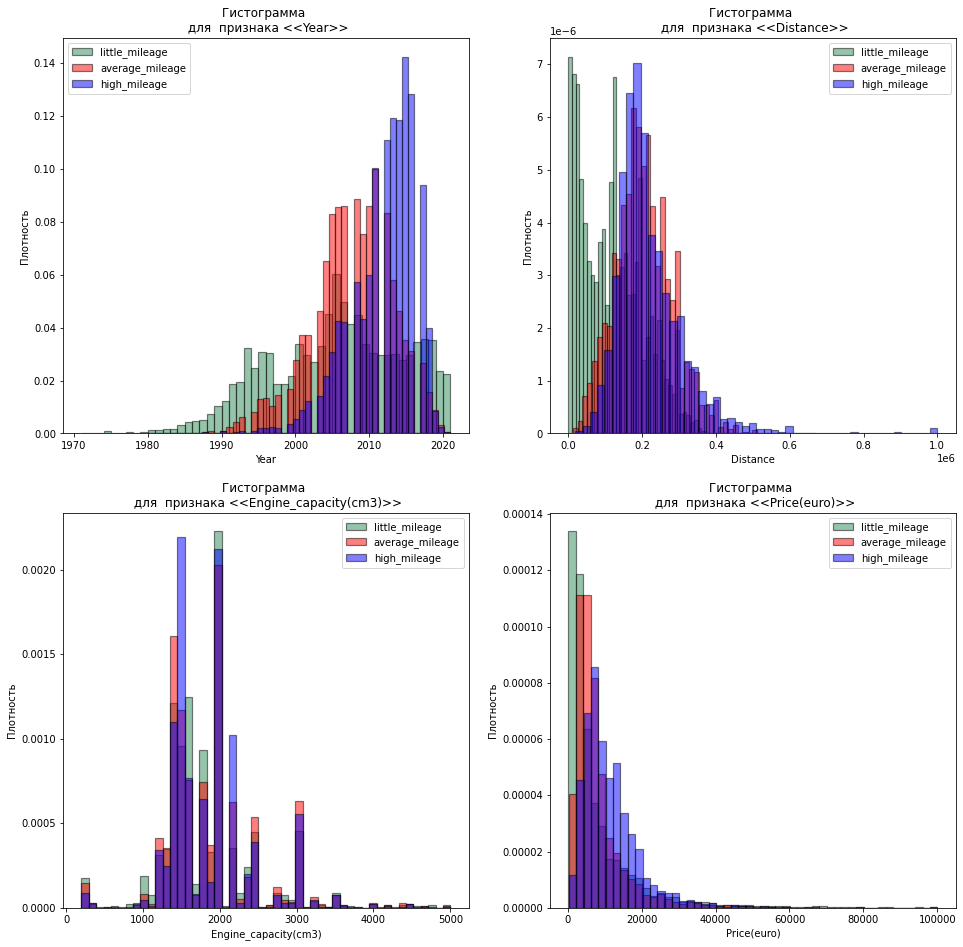

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16,16))
i = 0
l = 0
j = 0
for i in range(2):
    for j in range(2):
        axes[i, j].hist(df[df.km_year_q == "little_mileage"][num[l]], 
                        bins = 50, density=True, color = "seagreen", edgecolor='black', linewidth=1.2, 
                        alpha = 0.5, histtype = 'barstacked', label = 'little_mileage')
        axes[i, j].hist(df[df.km_year_q  == "average_mileage" ][num[l]], 
                        bins = 50, density=True,  color = "red", edgecolor='black', linewidth=1.2, 
                        alpha = 0.5, histtype = 'barstacked', label = 'average_mileage')
        axes[i, j].hist(df[df.km_year_q  == "high_mileage" ][num[l]], 
                        bins = 50, density=True,  color = "blue", edgecolor='black', linewidth=1.2, 
                        alpha = 0.5, histtype = 'barstacked', label = 'high_mileage')
        axes[i, j].set_title("Гистограмма \n для  признака <<{}>>".format(num[l]))
        axes[i, j].set_xlabel(num[l])
        axes[i, j].set_ylabel('Плотность')
        axes[i, j].legend()
        l+=1

## 2.2. «Умная» замена на редкие категории. В этот раз делайте замену вида «редкий дорогой» и «редкий дешевый», чтобы условные УАЗики не попали в одну группу с Jaguar

Разделим авто на дорогие и дешевые. Для этого посчитаем для каждого авто среднюю стоимость и потом определив медиану разделим авто на 2 группы - дорогие и дешевые.

In [ ]:
h = df.pivot_table(index = (df['Make']), values= "Price(euro)", aggfunc='mean').sort_values(by='Price(euro)', ascending=False)
h = h.reset_index().rename_axis(None, axis=1)
h.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Price(euro)    7169.69969
dtype: float64

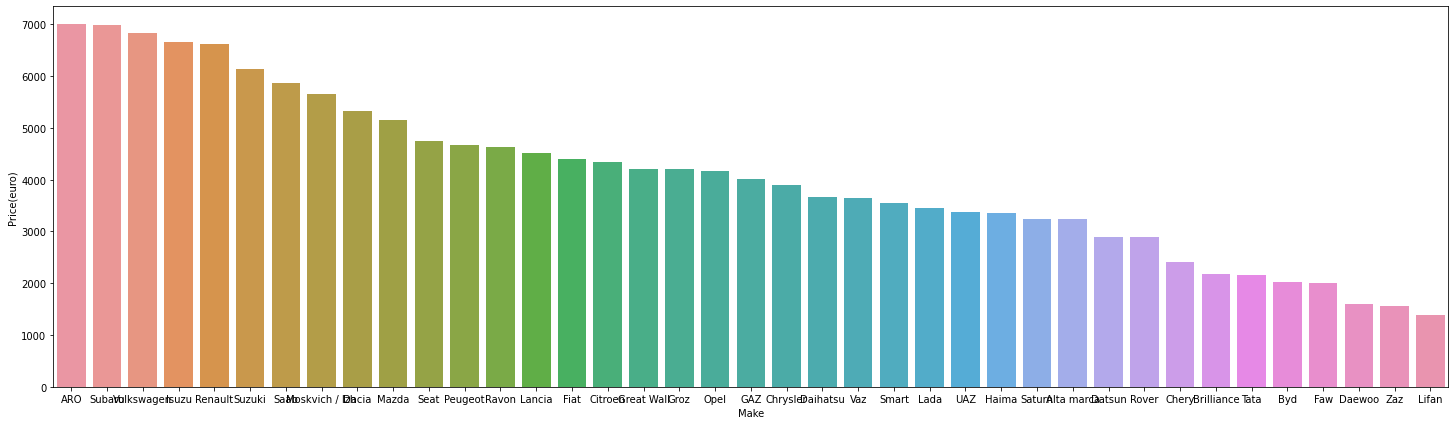

In [ ]:
plt.figure(figsize=(25,7))
h_min = h[h["Price(euro)"]< 7169]
sns.barplot(data=h_min, x='Make', y='Price(euro)')

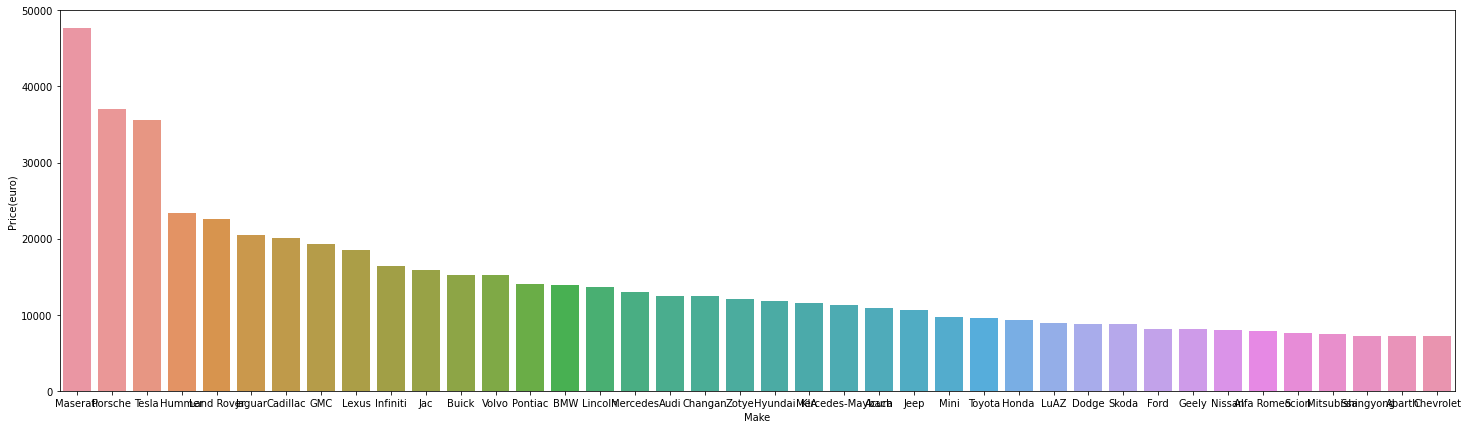

In [ ]:
plt.figure(figsize=(25,7))
h_max = h[h["Price(euro)"]> 7169]
sns.barplot(data=h_max, x='Make', y='Price(euro)')

In [ ]:
#создадим переменную, у которой каждое значение – частота наблюдений в категории переменных (Make)
val = df['Make'].value_counts()
df['Make_val'] = df['Make'].map(val)

In [ ]:
# создадим функцию для переменной, у которой каждое значение - среднее значение количественной переменной, взятое по уровню категориальной переменной
def code_mean(df, cat_feature, real_feature):
    return (df[cat_feature].map(df.groupby(cat_feature)[real_feature].mean()))

In [ ]:
df['Price_mean_make'] = code_mean(df, 'Make', 'Price(euro)')

In [ ]:
#по условию в задании 2.2. заменим редкие категории
df.loc[(df['Price_mean_make'] < 7169) & (df['Make_val'] < 25), 'Make'] = 'Rare_cheap'
df.loc[(df['Price_mean_make'] >= 7169) & (df['Make_val'] < 25), 'Make'] = 'Rare_expensive'

In [ ]:
df[df['Make'] == 'Rare_cheap'].head(2)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_year_q,Make_val,Price_mean_make
231,Rare_cheap,on-DO,2016,Sedan,150000.0,1596.0,Metan/Propan,Manual,3200.0,6,25000.000000,high_mileage,3,2899.666667
374,Rare_cheap,9-3,2007,Sedan,194777.0,2000.0,Petrol,Automatic,5000.0,15,12985.133333,average_mileage,15,5866.466667


In [ ]:
df[df['Make'] == 'Rare_expensive'].head(2)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_year_q,Make_val,Price_mean_make
21,Rare_expensive,Model S,2013,Hatchback,113000.0,367.0,Electric,Automatic,27000.0,9,12555.555556,average_mileage,3,35633.333333
445,Rare_expensive,CTS,2015,Sedan,88000.0,2000.0,Petrol,Automatic,16950.0,7,12571.428571,average_mileage,16,20142.500000


In [ ]:
df.Make.value_counts()

Volkswagen        3450
Toyota            3091
Mercedes          3032
BMW               2605
Renault           2371
Opel              1867
Skoda             1734
Audi              1556
Ford              1352
Dacia             1348
Nissan            1256
Hyundai           1220
Honda              904
KIA                658
Mitsubishi         620
Lexus              595
Volvo              579
Vaz                494
Mazda              444
Peugeot            389
Chevrolet          323
Citroen            298
Land Rover         288
Seat               242
Porsche            190
Fiat               189
Rare_cheap         188
Suzuki             154
Subaru             151
Rover               96
Chrysler            83
Jeep                79
Mini                72
Rare_expensive      69
Infiniti            67
Daewoo              64
Jaguar              64
Dodge               49
Lincoln             49
Alfa Romeo          39
Smart               34
GAZ                 32
Moskvich / Izh      32
Ssangyong  

In [ ]:
#Сохраним файл
df.to_csv('/content/cars_moldova_categor.csv',index=False)

# 3.Предварительная обработка данных

In [ ]:
#функция для построения однотипных гистограмм
def destrib_fig(data, trait, n_bins=50, l_space_start=0, l_space_stop=0.5, l_space_count=10, dens=True): #Функция для построения гистограмм

    target_mean = round(data[trait].mean(), 2)
    target_median = data[trait].median()
    target_mode = data[trait].mode()[0]
    target_quant005 = data[trait].quantile(0.05)
    target_quant995 = data[trait].quantile(0.995)

    plt.figure(figsize = (13, 5))
    plt.hist(data[trait], density=dens, bins=n_bins, alpha=0.9, ec='Black',color = "navy" )

    y = np.linspace(l_space_start, l_space_stop, l_space_count)
    plt.plot([target_mean] * l_space_count, y, label='mean', linestyle='--', linewidth=2)
    plt.plot([target_median] * l_space_count, y, label='median', linestyle='--', linewidth=2)
    plt.plot([target_mode] * l_space_count, y, label='mode', linestyle='--', linewidth=2)
    plt.plot([target_quant005] * l_space_count, y, label='Quantile 0.05', linestyle='--',linewidth=2)
    plt.plot([target_quant995] * l_space_count, y, label='Quantile 0.995', linestyle='--',linewidth=2)
    plt.title(f'Гистограмма для переменной {trait}')
    plt.legend()
    plt.show()

## 3.1. Стандартизация

In [ ]:
#Стандартизация, или z-нормировка для числовых данных
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

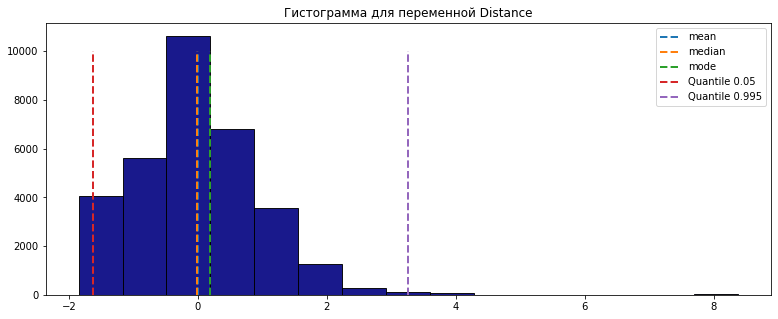

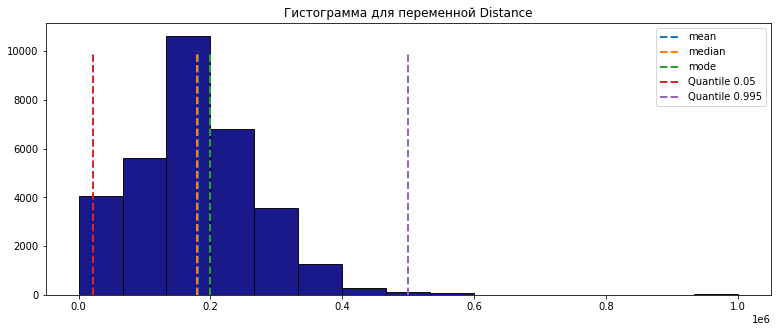

In [ ]:
#Пример изменения гистограммы по показателю 'Distance' после Стандартизации
destrib_fig(DF_scaled, 'Distance', dens=False, n_bins=15, l_space_stop=10000)
destrib_fig(df, 'Distance', dens=False, n_bins=15, l_space_stop=10000)

In [ ]:
DF_scaled.head(2)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_year_q,Make_val,Price_mean_make
0,Toyota,Prius,0.383647,Hatchback,0.142253,-0.110171,Hybrid,Automatic,-0.174700,11,17727.272727,high_mileage,3091,9629.435781
1,Renault,Grand Scenic,0.797815,Universal,-0.471631,-0.602326,Diesel,Manual,-0.090635,8,16875.000000,average_mileage,2371,6624.550822


In [ ]:
#Сохраним файл
DF_scaled.to_csv('/content/cars_moldova_scaled.csv',index=False)

## 3.2.Нормализация

In [ ]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

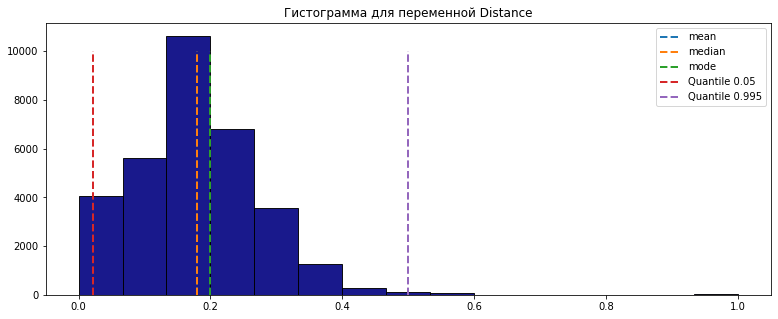

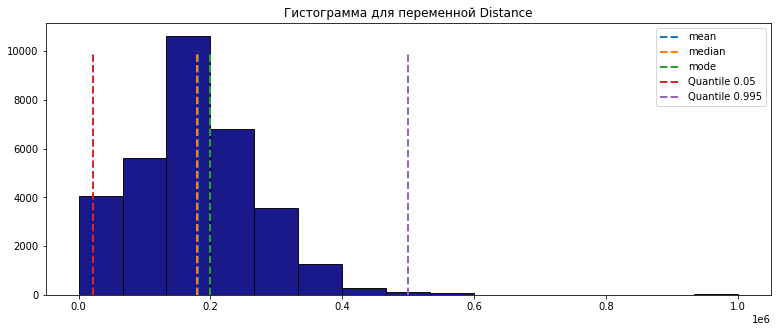

In [ ]:
#Пример изменения гистограммы по показателю 'Distance' после Стандартизации
destrib_fig(DF_norm, 'Distance', dens=False, n_bins=15, l_space_stop=10000)
destrib_fig(df, 'Distance', dens=False, n_bins=15, l_space_stop=10000)

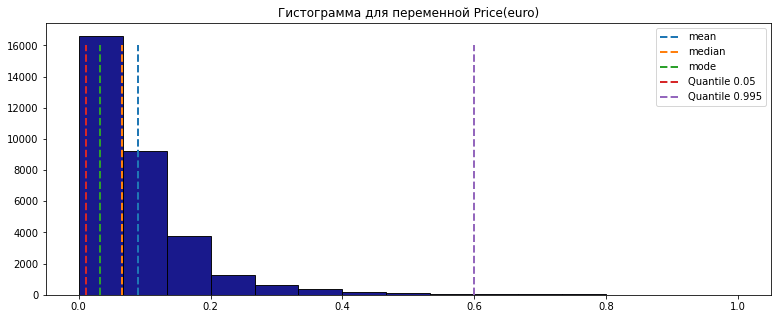

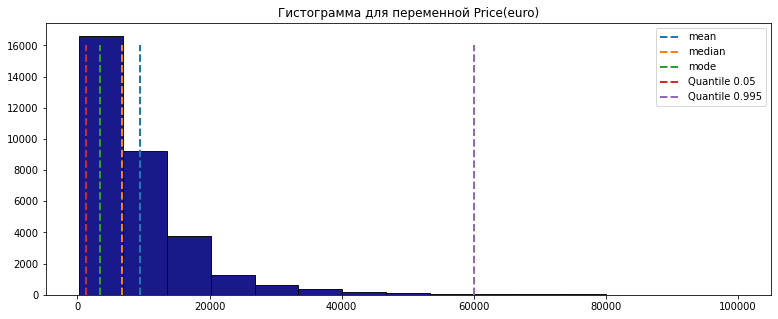

In [ ]:
#Пример изменения гистограммы по показателю 'Price(euro)' после Стандартизации
destrib_fig(DF_norm, 'Price(euro)', dens=False, n_bins=15, l_space_stop=16000)
destrib_fig(df, 'Price(euro)', dens=False, n_bins=15, l_space_stop=16000)

In [ ]:
#Сохраним файл
DF_norm.to_csv('/content/cars_moldova_norm.csv',index=False)

## 3.3. Cтепенное преобразование

In [ ]:
#Сначала логарифмирование, потом стандартизация
DF_power  = df.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M)/STD

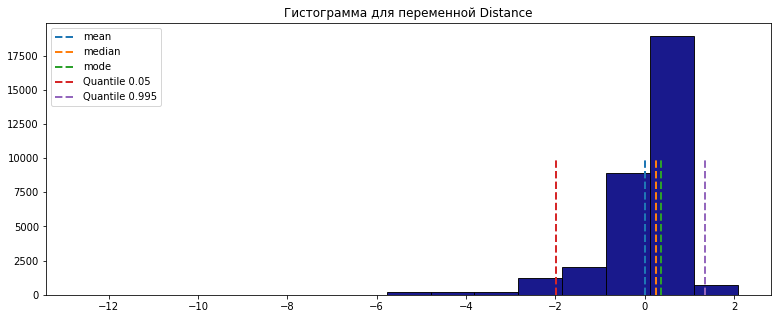

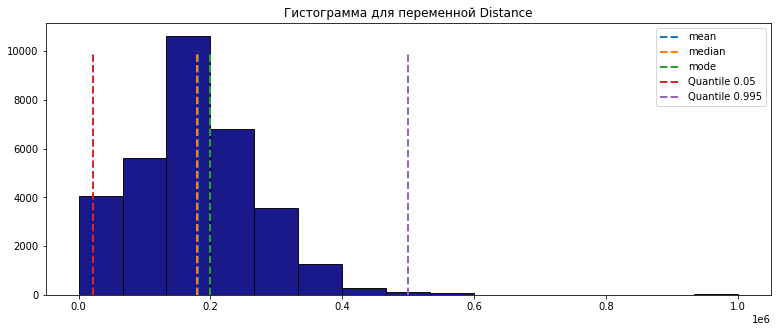

In [ ]:
#Пример изменения гистограммы по показателю 'Distance' после Стандартизации
destrib_fig(DF_power, 'Distance', dens=False, n_bins=15, l_space_stop=10000)
destrib_fig(df, 'Distance', dens=False, n_bins=15, l_space_stop=10000)

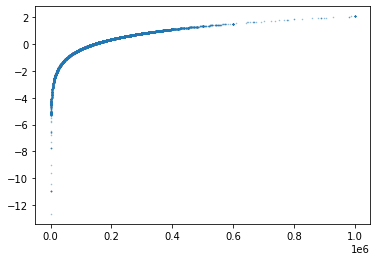

In [ ]:
plt.plot(df['Distance'], DF_power['Distance'], '.', alpha = 0.5, markersize = 1)

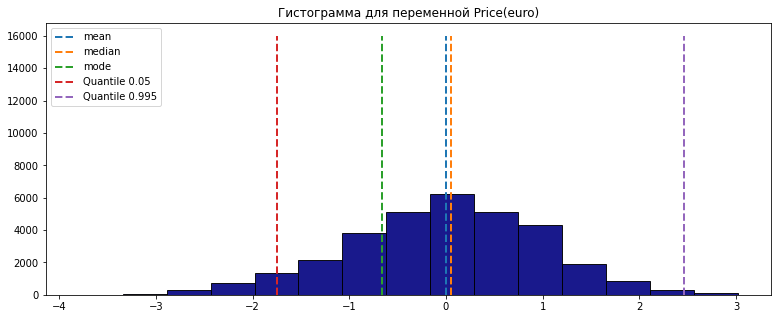

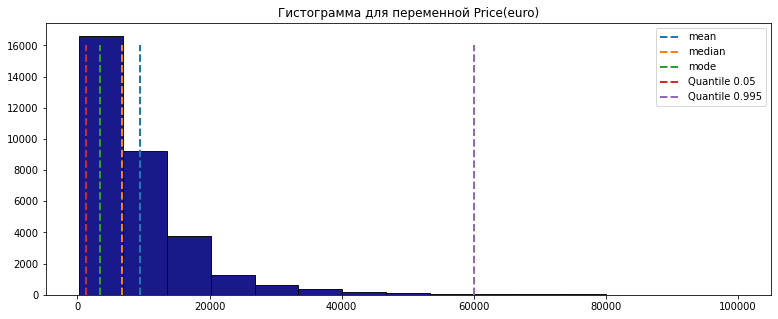

In [ ]:
#Пример изменения гистограммы по показателю 'Distance' после Стандартизации
destrib_fig(DF_power, 'Price(euro)', dens=False, n_bins=15, l_space_stop=16000)
destrib_fig(df, 'Price(euro)', dens=False, n_bins=15, l_space_stop=16000)

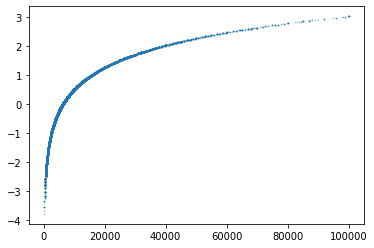

In [ ]:
plt.plot(df['Price(euro)'], DF_power['Price(euro)'], '.', alpha = 0.5, markersize = 1)

In [ ]:
#Сохраним файл
DF_power.to_csv('/content/cars_moldova_power.csv',index=False)

## 3.4. Ordinal

In [ ]:
df_se = df.copy()

In [ ]:
df_se['km_year_q'] = df_se['km_year_q'].map({'little_mileage': 0, 'average_mileage': 1, 'high_mileage': 2})

In [ ]:
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.head(2)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_year_q,Make_val,Price_mean_make
0,41,541,2011,4,195000.0,1800.0,2,0,7750.0,11,17727.272727,2,3091,9629.435781
1,33,364,2014,11,135000.0,1500.0,0,1,8550.0,8,16875.000000,1,2371,6624.550822


## 3.4. One-Hot Encoding

In [ ]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.head(2)

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,Make_val,Price_mean_make,Make_Alfa Romeo,Make_Audi,...,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual,km_year_q_little_mileage,km_year_q_average_mileage,km_year_q_high_mileage
0,2011,195000.0,1800.0,7750.0,11,17727.272727,3091,9629.435781,0,0,...,0,1,0,0,0,1,0,0,0,1
1,2014,135000.0,1500.0,8550.0,8,16875.000000,2371,6624.550822,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32474 entries, 0 to 32533
Columns: 858 entries, Year to km_year_q_high_mileage
dtypes: float64(5), int64(3), uint8(850)
memory usage: 29.6 MB


In [ ]:
#Сохранение файлов
df_se.to_csv('/content/cars_moldova_cat_num.csv',index=False)
df_ohe.to_csv('/content/cars_moldova_onehot.csv',index=False)